# Algoritmo de Maquinas de Vector Soporte (SVM) clásico

En este notebook se recoge el codigo relativo al capitulo de descripcion del algoritmo de Support Vector Machines (SVM) del trabajo.

El codigo elaborado permite la realización de una serie de figuras que describen la naturaleza de este algoritmo, su funcionamiento y los hiperparámetros de los que consta.

El código se ha desarrollado en python 3.10 y adicionalmente se utilizan las librerías de numpy, pandas, matplotLib para la realizacion de calculos, tratamiento de datos y visualizacion. Se utilizan tambien las librerías Scikit-Learn para las operaciones de Aprendizaje Máquina (Machine Learning) relativas al algoritmo SVM.

In [1]:
#cargamos las librerias necesarias

#librerias de datos y visualizacion
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

#librerias de Machine Learning
#generacion datos de muestra
from sklearn.datasets import make_blobs, make_moons
#procesado y transformaciones
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
# "Support vector classifier"
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

## Margenes funcionales y geométricos

Se genera un conjunto de datos $X$ con etiquetas $y$ pertenecientes a dos clases. El conjunto de datos tiene $m=50$ muestras y $n=2$ características. Se utiliza el generador de datos de muestra `make_blobs` de Scikit-Learn.

In [2]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

Se generan las graficas las funciones que podemos aprender de estos datos con un algoritmo de SVM lineal. Estas gráficas ilustran posibles lineas y margenes de separacion entre las clases y el márgen máximo.

El margen ilustra la confianza en la clasificación para diferentes muestras representadas en los puntos $A$,$B$,$C$

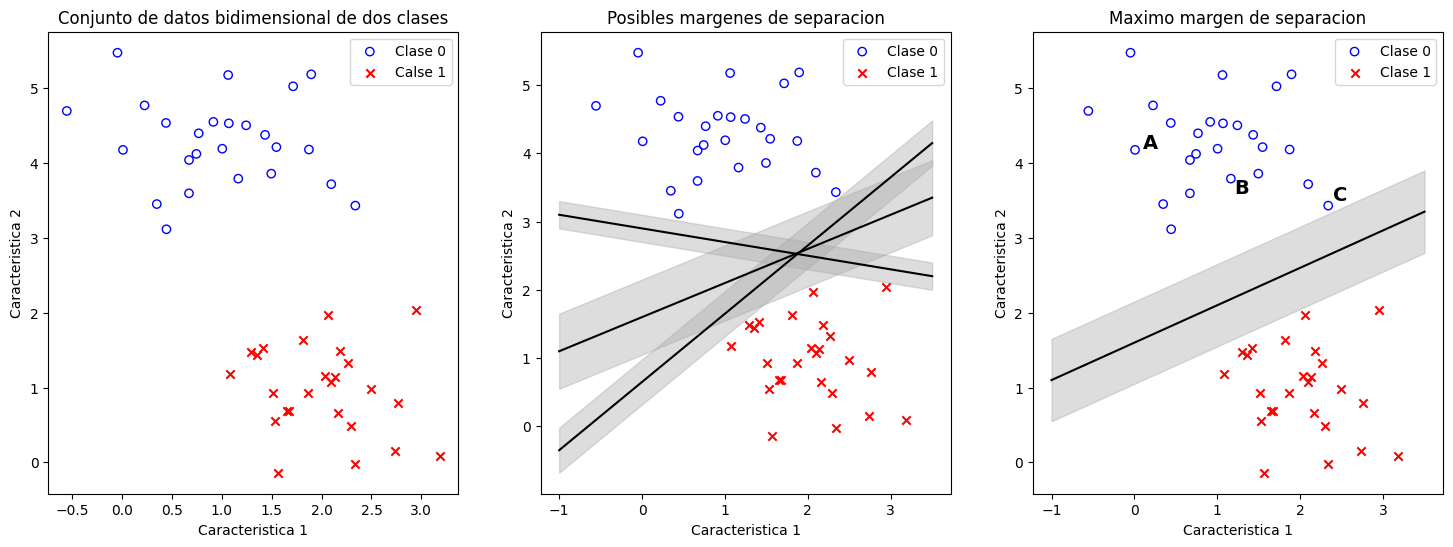

In [4]:
# Create the figure and two subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for the first subplot
ax1.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='o', edgecolors='blue', facecolors='none', label='Clase 0')
ax1.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='x', color='red', label='Calse 1')
ax1.set_title('Conjunto de datos bidimensional de dos clases')
ax1.set_xlabel('Caracteristica 1')
ax1.set_ylabel('Caracteristica 2')
ax1.legend()

# Scatter plot for the second subplot
x_linea = np.linspace(-1, 3.5)
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    y_linea = m * x_linea + b
    ax2.plot(x_linea, y_linea, '-k')
    ax2.fill_between(x_linea, y_linea - d, y_linea + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

ax2.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='o', edgecolors='blue', facecolors='none', label='Clase 0')
ax2.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='x', color='red', label='Clase 1')
ax2.set_title('Posibles margenes de separacion')
ax2.set_xlabel('Caracteristica 1')
ax2.set_ylabel('Caracteristica 2')
ax2.legend();

# Scatter plot for the third subplot
x_linea = np.linspace(-1, 3.5)
for m, b, d in [ (0.5, 1.6, 0.55)]:#[(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    y_linea = m * x_linea + b
    ax3.plot(x_linea, y_linea, '-k')
    ax3.fill_between(x_linea, y_linea - d, y_linea + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

ax3.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='o', edgecolors='blue', facecolors='none', label='Clase 0')
ax3.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='x', color='red', label='Clase 1')
# Insert the letters "A", "B", "C" at the specified coordinates
ax3.text(0.1, 4.2, 'A', fontsize=14, color='k', fontweight='bold')
ax3.text(1.2, 3.6, 'B', fontsize=14, color='k', fontweight='bold')
ax3.text(2.4, 3.5, 'C', fontsize=14, color='k', fontweight='bold')
ax3.set_title('Maximo margen de separacion')
ax3.set_xlabel('Caracteristica 1')
ax3.set_ylabel('Caracteristica 2')
ax3.legend()

fig.savefig('figuras/figura1.png')

Se genera las gráfica que ilustra el concepto de margen funcional del conjunto de datos de entrenamiento individuales $\gamma^{(i)}$ y el margen funcional minimo del conjunto de datos $S$, denominado  $\hat\gamma$.

También se genera la grafica que representa como calcular estos margenes de forma geométrica a partir del vector $(w, b)$

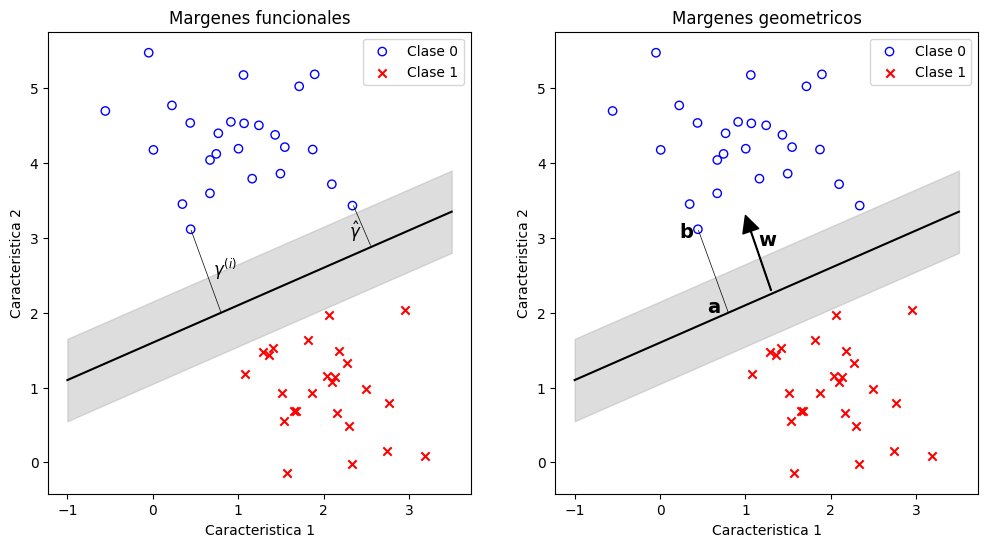

In [5]:
# Create the figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for the first subplot
x_linea = np.linspace(-1, 3.5)
for m, b, d in [ (0.5, 1.6, 0.55)]:
    y_linea = m * x_linea + b
    ax1.plot(x_linea, y_linea, '-k')
    ax1.fill_between(x_linea, y_linea - d, y_linea + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

ax1.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='o', edgecolors='blue', facecolors='none', label='Clase 0')
ax1.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='x', color='red', label='Clase 1')
# Add a line segment
ax1.plot([0.8, 0.45], [2, 3.1], color='k', linewidth=0.5)
# Add LaTeX-styled letter γ^i at the point (0.7, 0.5)
ax1.text(2.3, 3, r'$\hat{\gamma}$', fontsize=12, color='black')

# Add a line segment
ax1.plot([2.55, 2.35], [2.9, 3.43], color='k', linewidth=0.5)
# Add LaTeX-styled letter γ^i at the point (0.7, 0.5)
ax1.text(0.7, 2.5, r'$\gamma^{(i)}$', fontsize=12, color='black')

ax1.set_title('Margenes funcionales')
ax1.set_xlabel('Caracteristica 1')
ax1.set_ylabel('Caracteristica 2')
ax1.legend();

# Scatter plot for the second subplot
x_linea = np.linspace(-1, 3.5)
for m, b, d in [ (0.5, 1.6, 0.55)]:
    y_linea = m * x_linea + b
    ax2.plot(x_linea, y_linea, '-k')
    ax2.fill_between(x_linea, y_linea - d, y_linea + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

ax2.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='o', edgecolors='blue', facecolors='none', label='Clase 0')
ax2.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='x', color='red', label='Clase 1')
# Add a line segment
ax2.plot([0.8, 0.45], [2, 3.1], color='k', linewidth=0.5)
# Insert the letter "a", "b" at the specified coordinates
ax2.text(0.55, 2, 'a', fontsize=14, color='k', fontweight='bold')
ax2.text(0.23, 3, 'b', fontsize=14, color='k', fontweight='bold')

# Add an arrow vector w
ax2.text(1.15, 2.9, 'w', fontsize=14, color='k', fontweight='bold')
ax2.annotate('', xy=(1, 3.3), xytext=(1.3,2.3),
             arrowprops=dict(facecolor='k', edgecolor='k', width=0.5))

ax2.set_title('Margenes geometricos')
ax2.set_xlabel('Caracteristica 1')
ax2.set_ylabel('Caracteristica 2')
ax2.legend()


fig.savefig('figuras/figura2.png')


## Clasificador de márgenes optimos (SVM)

En scikit-learn utilizamos la clase [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) para el algoritmo dde clasificacion de SVM.

Entrenamos el modelo con los datos generados. Nuestro objetivo es encontrar la linea que separa ambas clases, así que por el momento utilizaremos el clasificador lineal $(kernel=lineal)$.

In [6]:
model = SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

Se generan las graficas que representan como el clasificador de margenes óptimo (SVC) es capaz de encontrar el máximo margen de separacion y las muestras que caracterizan este máximo margen, que se conocen como los **vectores soporte**

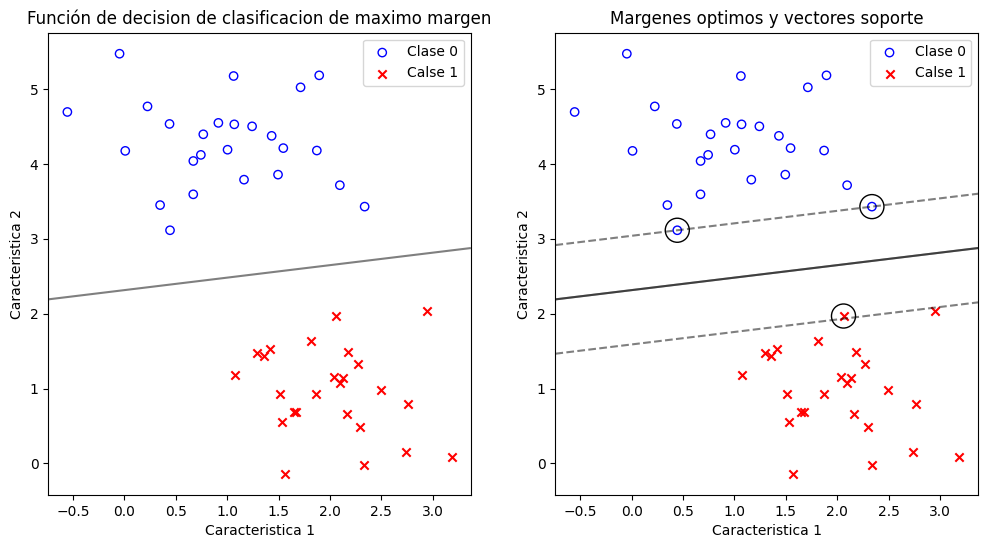

In [7]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # plot decision boundary
    ax.contour(X, Y, P, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

    # plot support vectors
    if plot_support:
        # plot margins
        ax.contour(X, Y, P, colors='k',
            levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
        #if the model do not have support_vector_ param, set plot_sopport=False
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1,marker='o',edgecolor='black',facecolor='none')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Create the figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='o', edgecolors='blue', facecolors='none', label='Clase 0')
ax1.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='x', color='red', label='Calse 1')
ax1.set_title('Función de decision de clasificacion de maximo margen')
ax1.set_xlabel('Caracteristica 1')
ax1.set_ylabel('Caracteristica 2')
ax1.legend()
plot_svc_decision_function(model,ax1,plot_support=False)

# Create the figure and two subplots
ax2.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='o', edgecolors='blue', facecolors='none', label='Clase 0')
ax2.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='x', color='red', label='Calse 1')
ax2.set_title('Margenes optimos y vectores soporte')
ax2.set_xlabel('Caracteristica 1')
ax2.set_ylabel('Caracteristica 2')
ax2.legend()
plot_svc_decision_function(model,ax2,plot_support=True)

fig.savefig('figuras/figura3.png')


## Escalado de los datos y tecnicas de regularizacion

El algoritmo de SVM es muy sensible al escalado de los datos. Si una de las variables tiene un rango de variación mucho mayor el maximo valor de margen seguirá esa direccion forzosamente. El clasificador elegirá un mejor hiperplano de discriminación si todas las variables están correctamente escaladas y no forzamos que elija una direccion determinada.

Se generan unos conjuntos de datos que son muestras bidimensionales que tienen una caracteristica $x_2$ en la componente de las ordenadas 10x mas escala que la componente $x_1$ en la de las abcisas.

Se generan dos graficas donde veamos el margen resultado que aprende el algoritmo SVM sin aplicar escalado y tras aplicar escalado de las caracteristicas. El escalado que se aplica es la transformacion de `StandardScaler` de las librerías Scikit-Learn. Si no hay escalado de los datos, el margen lo determina la caracteristica que presenta mayor rango de valores.





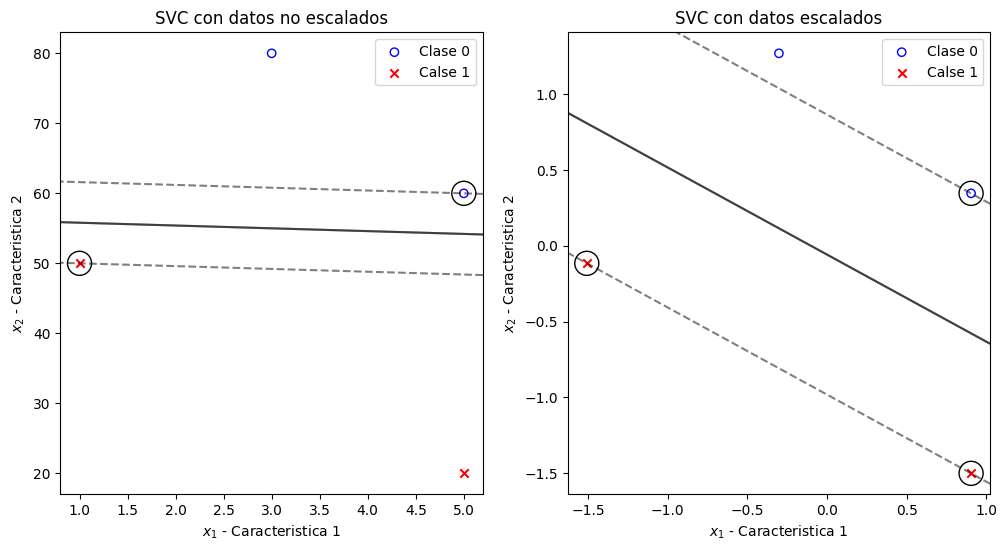

In [8]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf1 = SVC(kernel="linear").fit(Xs, ys)

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax1.scatter(Xs[:, 0][ys==1], Xs[:, 1][ys==1], marker='o', edgecolors='blue', facecolors='none', label='Clase 0')
ax1.scatter(Xs[:, 0][ys==0], Xs[:, 1][ys==0], marker='x', color='red', label='Calse 1')
plot_svc_decision_function(svm_clf1,ax1)
ax1.set_title('SVC con datos no escalados')
ax1.set_xlabel('$x_1$ - Caracteristica 1')
ax1.set_ylabel('$x_2$ - Caracteristica 2')
ax1.legend()




scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf2=SVC(kernel="linear", C=100).fit(X_scaled, ys)

ax2= fig.add_subplot(122)
ax2.scatter(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], marker='o', edgecolors='blue', facecolors='none', label='Clase 0')
ax2.scatter(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], marker='x', color='red', label='Calse 1')
plot_svc_decision_function(svm_clf2, ax2)
ax2.set_title('SVC con datos escalados')
ax2.set_xlabel('$x_1$ - Caracteristica 1')
ax2.set_ylabel('$x_2$ - Caracteristica 2')
ax2.legend()

fig.savefig('figuras/figura4.png')

Las clasificaciones realizadas hasta ahora tienen un unas clases que estaban separadas. Si esto no es así, si no que los datos contienen ruido y las clases se solapan se requiere ajustar el clasificador para con un parámetro de error de clasificación, de forma que podamos encontrar un margen ajistado de forma que penalice las muestras que quedan dentro del margen en mayor o menor grado.

SVM es un algoritmo flexible que permite definir el margen de separacion cometendo algunos errores de clasificación, para ajustar el margen de decisión y poder clasificar en las zonas de solape.

La implementación de SVM contiene un parámetro para relajar el requisito de ajuste con máximo margen. Se trata del **parámetro de penalización del error de clasificación C**.

Si se impone que todas las muestras deben de quedar fuera del margen, esto se denomina **Clasificacion Fuerte** o **de margen fuerte**. En este caso el valor del parámetro C debe de ser muy alto dado que imponemos una penalización muy alta al error de clasificación. Este margen será pequeño, no habrá muestras en su interior mal clasificadas.

La cuestión de la clasificación fuerte es que no funciona si los datos no son separables y es muy sensible a valores espúreos de muestras que contienen ruido y se aproximan o se meten dentro de la otra clase (outliers).

Para evitar esto y permitir que las clases estén algo solapadas o mezcladas es preferible utilizar un modelo más flexible. El objetivo es encontrar un buen balance entre tener el margen tan grande como podamos pero admitimos un numero limitado de muestras que quedan en su interior. Eso se denomina **Clasificación Suave** o **de margen suave**.En este caso el valor del parámetro C es bajo e imponemos upoca penalización en errores de clasificación. Si C es bajo se permiten errores de clasificación, el margen es más amplio y puede haber muestras de entrenamiento en el.

Se entiende por tanto que el parámetro **C** es un **parámetro de regularizacion** que nos permite aprender un margen más genral, una frontera más generalizada para conjuntos de datos de entrenamiento que contienen ruido y se solapan. Un valor menor de $C$ nos permite encontrar un margen más general o suave.

Se genera un conjunto de datos bidimensionales de $m=100$ muestras y $n=2$ características en los que las muestras de las dos clases se mezclan en la frontera de separacion. Se generan dos gráficas en las que se ejecuta el algoritmo SVC con diferentes valores de $C$ (por ejemplo: 100.0 y 0.1) y se representan los margenes de clasificacion y los vectores soporte encontrados por el algoritmo:

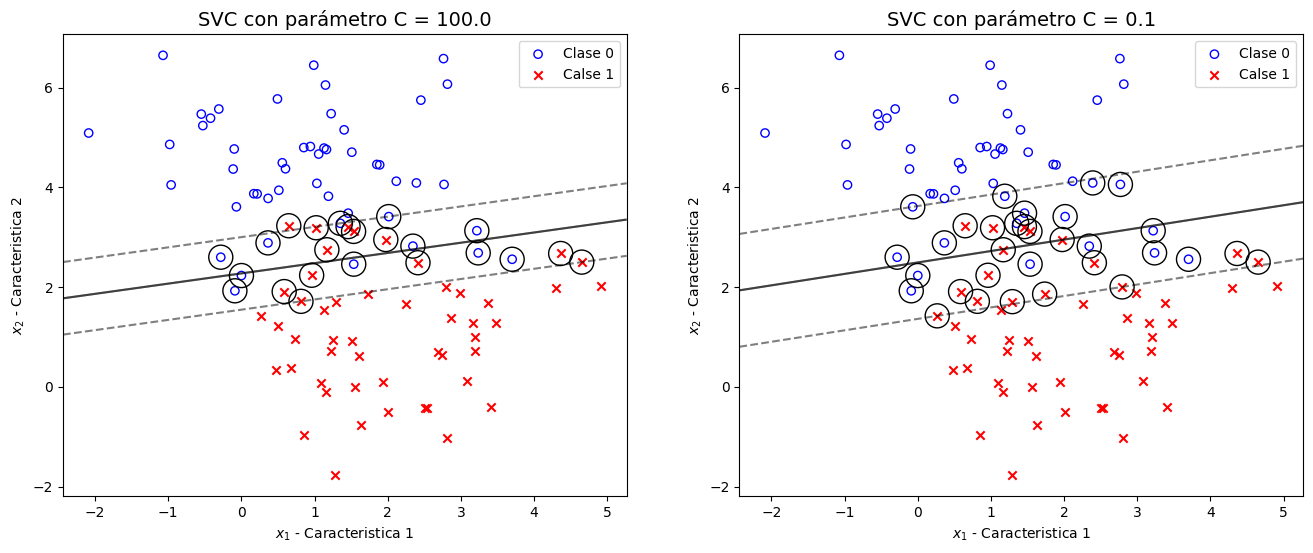

In [9]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

for axi, C in zip(ax, [100.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='o', edgecolors='blue', facecolors='none', label='Clase 0')
    axi.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='x', color='red', label='Calse 1')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_xlabel('$x_1$ - Caracteristica 1')
    axi.set_ylabel('$x_2$ - Caracteristica 2')
    axi.legend()
    axi.set_title('SVC con parámetro C = {0:.1f}'.format(C), size=14)

fig.savefig('figuras/figura5.png')

## Kernels

Se crea una figura para ilustrar el proceso de mapear las caracteristicas de los datos. Este proceso permite realizar el el aprendizaje sobre un espacio de mayor dimension $V$ que generalmente facilitará la separacion lineal de las clases.

La funcion de optimizacion del algoritmo SVC solo necesita el calculo del producto escalar de los datos, por lo que el aprendizaje solo requiere evaluar la funcion de kernel $K$.

In [1]:
# Display the image
Image(filename="figuras/figura6.png")

NameError: name 'Image' is not defined

Se generan dos figuras para ilustrar como el mapeo polinomico de grado 2 de las caracteristicas de un set de datos de una dimension, se hace separable en dos dimensiones tras el mapeo.

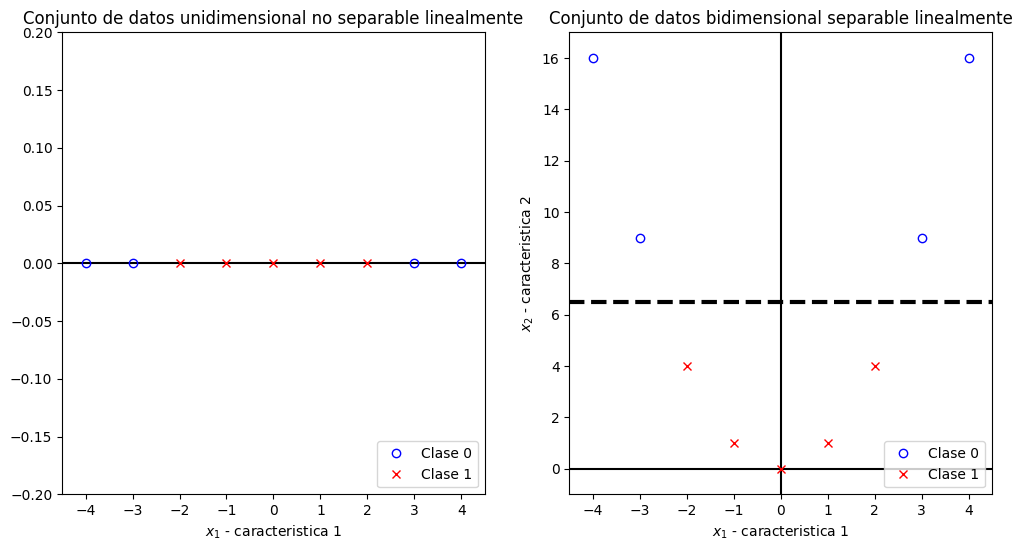

In [11]:
# Create the figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

#plt.grid(True, which='both')
ax1.axhline(y=0, color='k')
ax1.plot(X1D[:, 0][y==0], np.zeros(4), marker='o',  markeredgecolor='b', markerfacecolor='none', linestyle='none', label='Clase 0')
ax1.plot(X1D[:, 0][y==1], np.zeros(5), "rx", label='Clase 1')
ax1.axis([-4.5, 4.5, -0.2, 0.2])
ax1.set_title('Conjunto de datos unidimensional no separable linealmente')
ax1.set_xlabel('$x_1$ - caracteristica 1')
ax1.legend(loc='lower right')


#plt.grid(True, which='both')
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], marker='o',  markeredgecolor='b', markerfacecolor='none', linestyle='none', label='Clase 0')
ax2.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "rx", label='Clase 1')
ax2.plot([-4.5, 4.5], [6.5, 6.5], "k--", linewidth=3)
ax2.axis([-4.5, 4.5, -1, 17])
ax2.set_title('Conjunto de datos bidimensional separable linealmente')
ax2.set_xlabel('$x_1$ - caracteristica 1')
ax2.set_ylabel('$x_2$ - caracteristica 2')
ax2.legend(loc='lower right')

fig.savefig('figuras/figura7.png')

Se genera un conjunto de datos bidimensional no separable linealmente utilizando el generador de datos de muestra `make_moons` de Scikit-Learn. Se genera la gráfica donde se ilustra que este conjunto de datos no es separable linealmente en dos dimensiones.

Se aplica un pipeline de escalado y transformacion polinimial de grado 3 a los datos iniciales. Se entrena el algoritmo SVC con los datos transformados y se genera una gráfica que ilustra que el algoritmo es capaz de encontrar una frontera no lineal de maximo margen entre las clases

In [12]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        #warning - podemos incrementar max_iter de 1000 por defecto a 10000 para que converga
        ("svm_clf", SVC(C=1E5))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()), ('svm_clf', SVC(C=100000.0))])

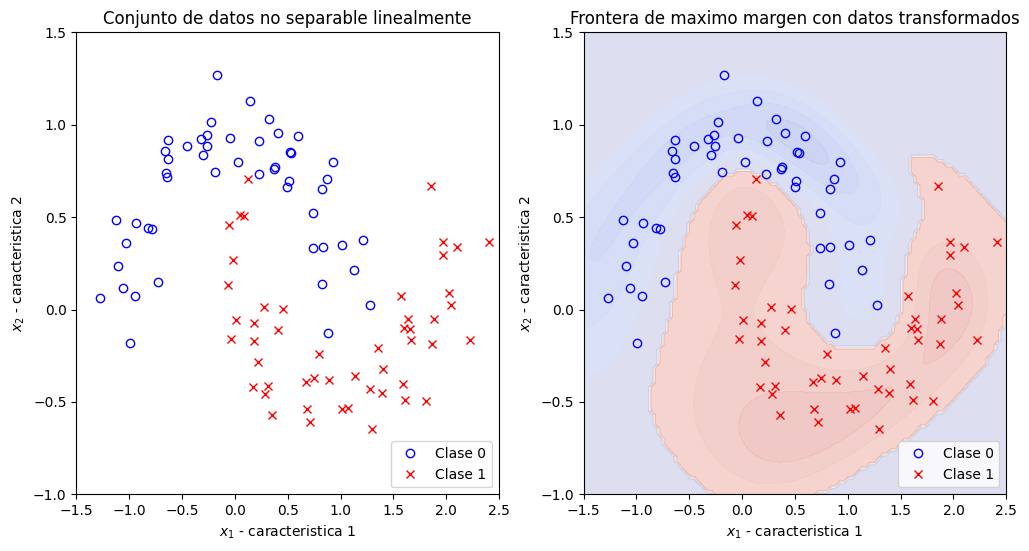

In [13]:
#funcion util para visualizar frontera de separacion de un clasificador
def plot_predictions(clf, ax, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    ax.contourf(x0, x1, y_pred, cmap='coolwarm', alpha=0.2)  #otro colormap "Greys"
    ax.contourf(x0, x1, y_decision, cmap='coolwarm', alpha=0.1) #otro colormap "Greys"


# Create the figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.grid(False, which='both')
ax1.axhline(y=0, color='k')
ax1.plot(X[:, 0][y==0], X[:, 1][y==0], marker='o',  markeredgecolor='b', markerfacecolor='none', linestyle='none', label='Clase 0')
ax1.plot(X[:, 0][y==1], X[:, 1][y==1], "rx", label='Clase 1')
ax1.axis([-1.5, 2.5, -1, 1.5])
ax1.set_title('Conjunto de datos no separable linealmente')
ax1.set_xlabel('$x_1$ - caracteristica 1')
ax1.set_ylabel('$x_2$ - caracteristica 2')
ax1.lines[0].remove() #remove line x=0
ax1.legend(loc='lower right')

#plt.grid(True, which='both')
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.plot(X[:, 0][y==0], X[:, 1][y==0], marker='o',  markeredgecolor='b', markerfacecolor='none', linestyle='none', label='Clase 0')
ax2.plot(X[:, 0][y==1], X[:, 1][y==1], "rx", label='Clase 1')
ax2.axis([-1.5, 2.5, -1, 1.5])
ax2.set_title('Frontera de maximo margen con datos transformados')
ax2.set_xlabel('$x_1$ - caracteristica 1')
ax2.set_ylabel('$x_2$ - caracteristica 2')
ax2.lines[0].remove() #remove line x=0
ax2.lines[0].remove() #remove line x=0
ax2.legend(loc='lower right')
plot_predictions(polynomial_svm_clf, ax2, [-1.5, 2.5, -1, 1.5])

fig.savefig('figuras/figura8.png')